# Traitement de signal
### Support de cours disponible à l'adresse : [https://www.github.com/a-mhamdi/isetbz](https://www.github.com/a-mhamdi/isetbz)

---

**Table des matières**
1. [Analyse et synthèse des signaux](#ana-syn-sig)
    1. [Signaux typiques](#sig-typ)
    2. [Généralisation](#gen-sig)
    3. [Exemples illustratifs](#eg-illustra)
2. [Convolution](#conv)
3. [Décomposition en série de Fourier](#dec-fourier)
    1. [Exemple d'un signal carré](#eg-1-sf)
    2. [Exemple d'un signal en dents de scie](#eg-2-sf)
4. [Transformée de Fourier](#tf-fourier)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = [15, 10]
plt.rc({"keymap.grid": "g", "font.serif": "Charter", "font.size": 10})

## Analyse et synthèse des signaux <a name="ana-syn-sig"></a>

### Signaux typiques <a name='sig-typ'></a>

#### Rampe

$$\left\{\begin{array}{lcc}
r(t) = t & \text{ssi} & t\geq 0\\
r_1(t) = t-1 & \text{ssi} & t\geq 1\\
1.5r_2(t) = 1.5(t-2) & \text{ssi} & t\geq 2
\end{array}\right.$$

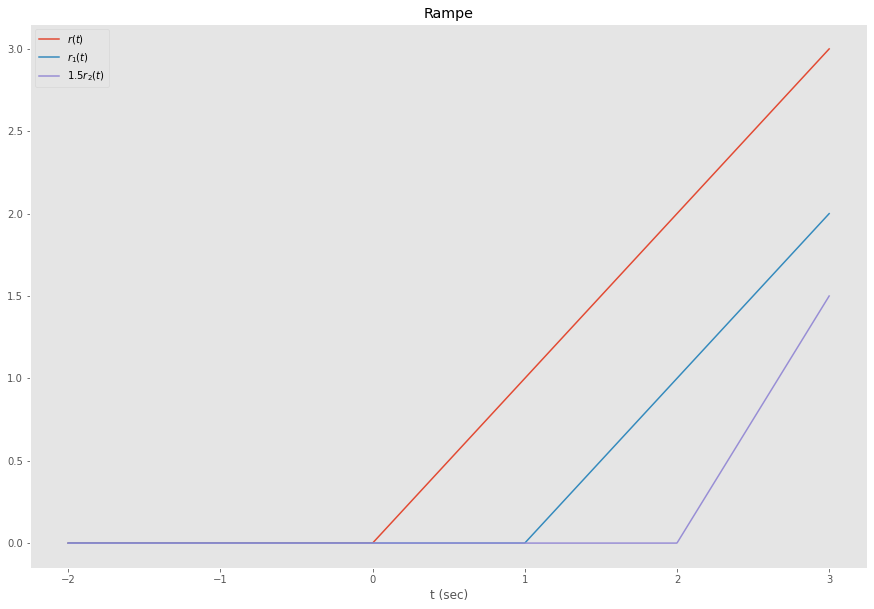

In [2]:
t = np.linspace(-2, 3, 1000)
x = t * ( t>=0 ).astype(int)
y = (t-1) * ( t>=1 ).astype(int)
z = 1.5*(t-2) * ( t>=2 ).astype(int)
plt.plot(t, x, label=r'$r(t)$')
plt.plot(t, y, label=r'$r_1(t)$')
plt.plot(t, z, label=r'$1.5r_2(t)$')
plt.grid()
plt.legend()
plt.xlabel('t (sec)')
plt.title('Rampe')
plt.show()

#### Echelon

$$\left\{\begin{array}{lcc}
\Gamma(t) = 1 & \text{ssi} & t\geq 0\\
\Gamma_1(t) = 1&  \text{ssi} & t\geq 1\\
1.5\Gamma_2(t) = 1.5 & \text{ssi} & t\geq 2
\end{array}\right.$$

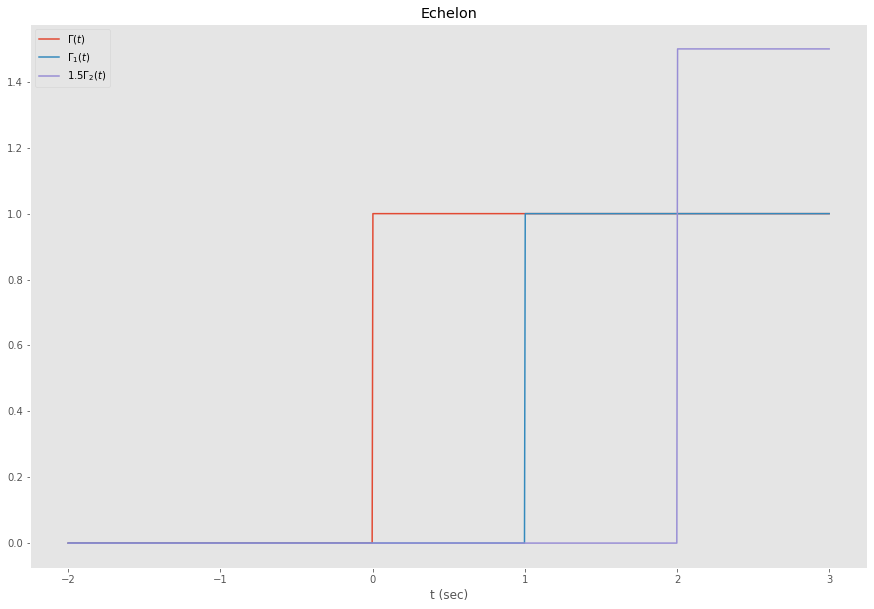

In [3]:
t = np.linspace(-2, 3, 1000)
x = ( t>=0 ).astype(int)
y = ( t>=1 ).astype(int)
z = 1.5 * ( t>=2 ).astype(int)
plt.plot(t, x, label=r'$\Gamma(t)$')
plt.plot(t, y, label=r'$\Gamma_1(t)$')
plt.plot(t, z, label=r'$1.5\Gamma_2(t)$')
plt.grid()
plt.legend()
plt.xlabel('t (sec)')
plt.title('Echelon')
plt.show()

#### Distribution de Dirac

$$\left\{\begin{array}{lcccc}
\delta(t) = 1 &\text{ ssi } & t = 0&&\\
\delta(t-1) = 1 &\text{ ssi } & t-1 = 0 & \Rightarrow& t=1\\
1.5\delta(t-2) = 1.5 &\text{ ssi }& t-2 = 0 &\Rightarrow& t=2
\end{array}\right.$$

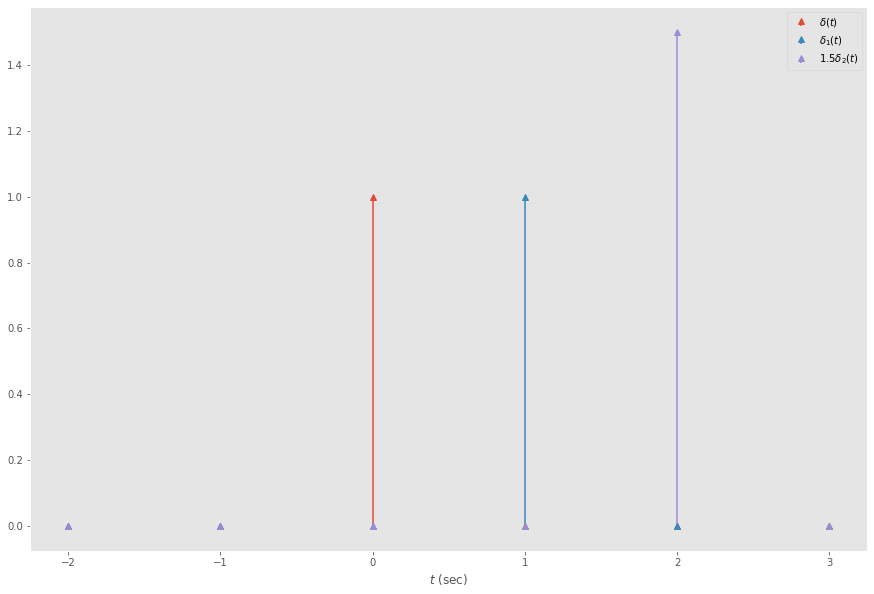

In [4]:
t = np.linspace(-2, 3, 6); nt = len(t)
x = np.zeros(len(t)); x[ t==0.0 ] = 1;
y = np.zeros(len(t)); y[ t==1.0 ] = 1;
z = np.zeros(len(t)); z[ t==2.0 ] = 1.5;

plt.stem(t,x,'C0',markerfmt='C0^',basefmt=" ",label=r'$\delta(t)$',use_line_collection=True)
plt.stem(t,y,'C1',markerfmt='C1^',basefmt=" ",label=r'$\delta_1(t)$',use_line_collection=True)
plt.stem(t,z,'C2',markerfmt='C2^',basefmt=" ",label=r'$1.5\delta_2(t)$',use_line_collection=True)
plt.xlabel('$t$ (sec)')
plt.legend()
plt.grid()
plt.show()

### Généralisation <a name="gen-sig"></a>

De façon générale, on dénote par $f(t-\tau)\;=\;f_\tau(t)$ la fonction $f(t)$ retardée de $\tau$. En partiulier :

> $$\Large{\Gamma_\tau(t) \;=\; \underbrace{\Gamma(t-\tau)}_{\text{G_tau(t, tau)}}}\qquad \& \qquad \Large{r_\tau(t) \;=\; \underbrace{r(t-\tau)}_{\text{r_tau(t, tau)}}}$$

In [5]:
t = np.linspace(-0.5, 2.5, 1000)

def G_tau(t, tau=0):
    return (t>=tau).astype(int)

def r_tau(t, tau=0):
    return (t>=tau).astype(int) * (t-tau)


### Exemples illustratifs <a name='eg-illustra'></a>

#### Exemple \#1

$$x(t) \;=\; \Gamma_{0.25}(t)-0.5\Gamma_{0.75}(t)-0.5\Gamma_2(t)$$

In [6]:
x = G_tau(t,0.25)-0.5*G_tau(t,0.75)-0.5*G_tau(t,2)

$$y(t) \;=\; 1.5\Gamma_0.5-1.5\left(r_1-r_2\right)$$

In [7]:
y = 1.5*G_tau(t,0.5)-1.5*(r_tau(t,1)-r_tau(t,2))

$$z(t) \;=\; \Gamma_{0.25}-0.5\Gamma_{0.75}-0.5\left(r_1-r_2\right)$$

In [8]:
z = G_tau(t,0.25)-0.5*G_tau(t,0.75)-0.5*(r_tau(t,1)-r_tau(t,2))

$$w(t) \;=\; 1.5\Gamma-2.25\Gamma_{0.75}+2\left(r_{0.75}-r_{1.5}\right)-1.5\left(r_{1.5}-r_{2}\right)$$

In [9]:
w = 1.5*G_tau(t)-2.25*G_tau(t,0.75)+2*(r_tau(t,0.75)-r_tau(t,1.5))-1.5*(r_tau(t,1.5)-r_tau(t,2))

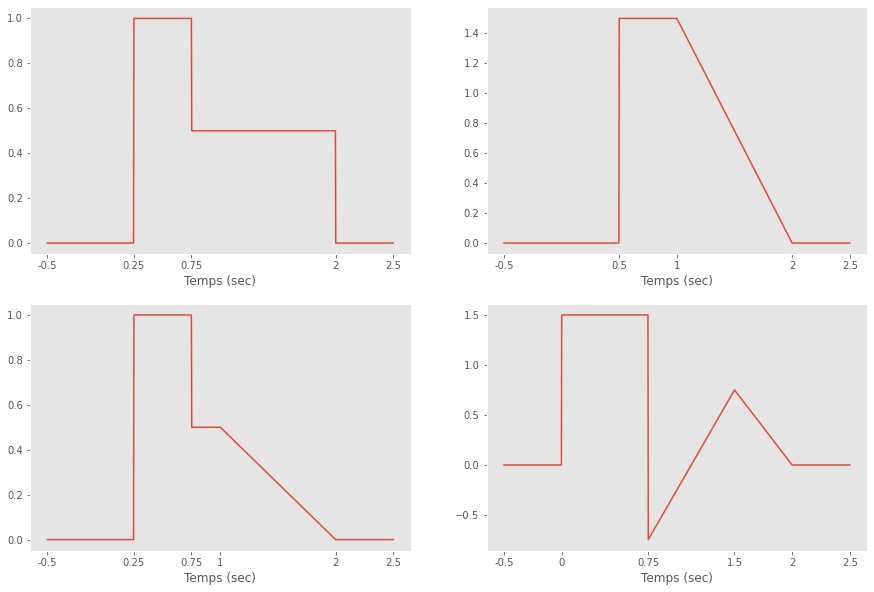

In [10]:
plt.subplot(2,2,1); plt.plot(t, x); plt.xlabel('Temps (sec)')
plt.xticks([-0.5,0.25,0.75,2,2.5], [-0.5,0.25,0.75,2,2.5])
plt.grid()
plt.subplot(2,2,2); plt.plot(t, y); plt.xlabel('Temps (sec)')
plt.xticks([-0.5,0.5,1,2,2.5],[-0.5,0.5,1,2,2.5])
plt.grid()
plt.subplot(2,2,3); plt.plot(t, z); plt.xlabel('Temps (sec)')
plt.xticks([-0.5,0.25,.75,1,2,2.5],[-0.5,0.25,.75,1,2,2.5])
plt.grid()
plt.subplot(2,2,4); plt.plot(t, w); plt.xlabel('Temps (sec)')
plt.xticks([-0.5,0,.75,1.5,2,2.5],[-0.5,0,.75,1.5,2,2.5])
plt.grid()

#### Exemple \#2

$$x \;=\; \Gamma-0.75r_1+1.35r_2-0.5\Gamma_3$$

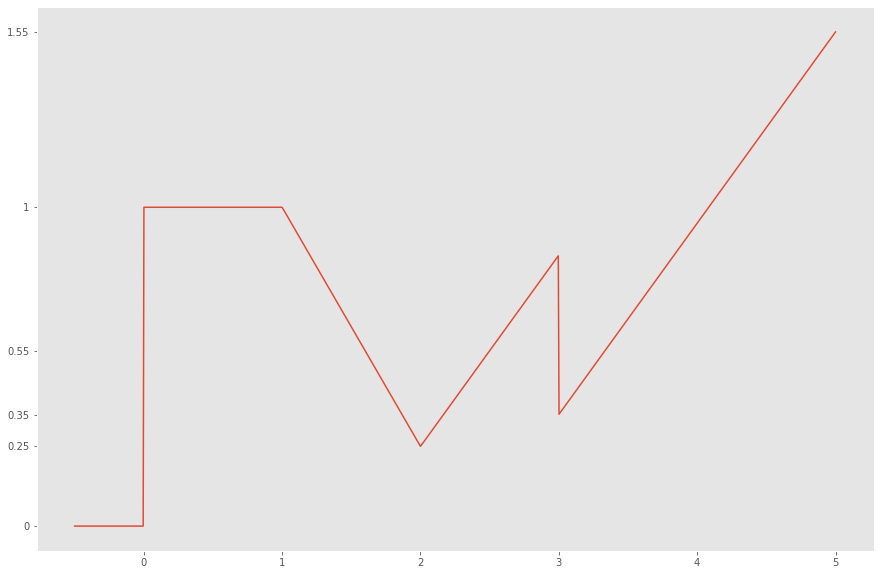

In [11]:
t = np.linspace(-0.5,5,1000)
x = G_tau(t)-0.75*r_tau(t,1)+1.35*r_tau(t,2)-0.5*G_tau(t,3)
plt.plot(t,x)
plt.xticks([0,1,2,3,4,5],[0,1,2,3,4,5])
plt.yticks([0,0.25,0.35,0.55,1,1.55],[0,0.25,0.35,0.55,1,1.55])
plt.grid()

#### Exemple \#3

$$x(t) \;=\; 0.5\Gamma+0.5\Gamma_1-1.25\Gamma_2$$

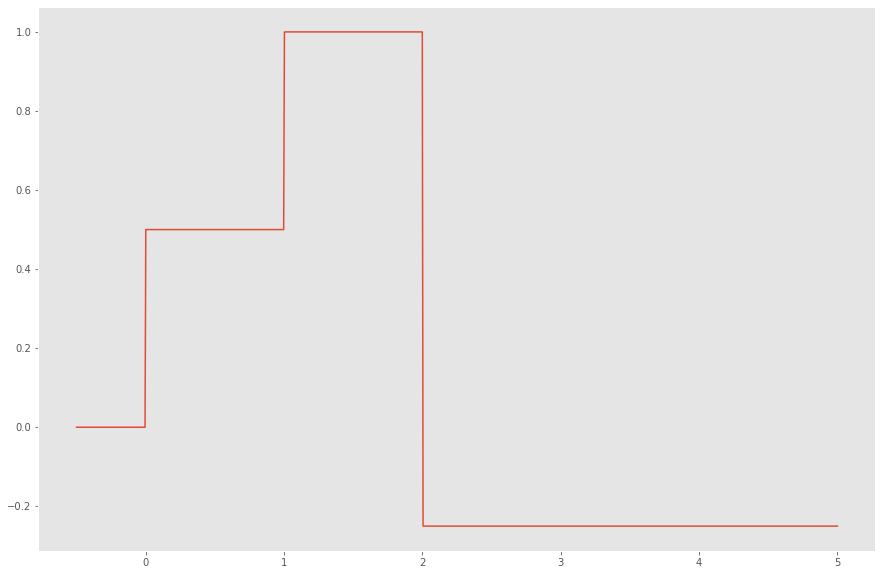

In [12]:
t = np.linspace(-0.5,5,1000)
x = 0.5*G_tau(t)+0.5*G_tau(t,1)-1.25*G_tau(t,2)
plt.plot(t,x)
plt.grid()

#### Exemple \#4

$$x(t) \;=\; \Gamma_2-0.5\Gamma_3+1.25\Gamma_2$$

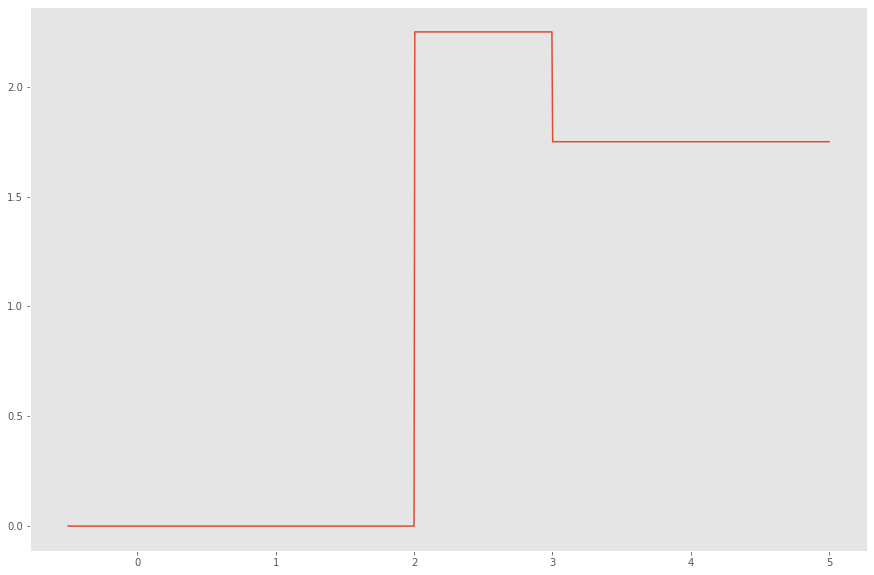

In [13]:
t = np.linspace(-0.5,5,1000)
x = G_tau(t,2)-0.5*G_tau(t,3)+1.25*G_tau(t,2)
plt.plot(t,x)
plt.grid()

#### Exemple \#5

$$ x(t) \;=\; 1.125r_2+0.875r_3-3.0625r_4+0.625r_5$$

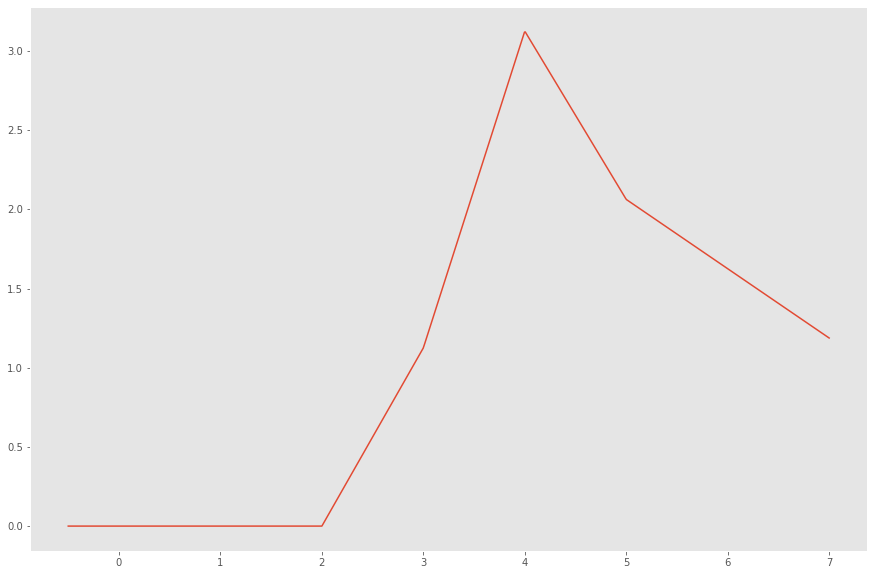

In [14]:
t = np.linspace(-0.5,7,1000)
x = 1.125*r_tau(t,2)+0.875*r_tau(t,3)-3.0625*r_tau(t,4)+0.625*r_tau(t,5)
plt.plot(t,x)
plt.grid()

#### Exemple \#6

$$ x(t) \;=\; \Gamma +0.5\Gamma_1+0.75r_1-1.25r_2-\Gamma_3$$

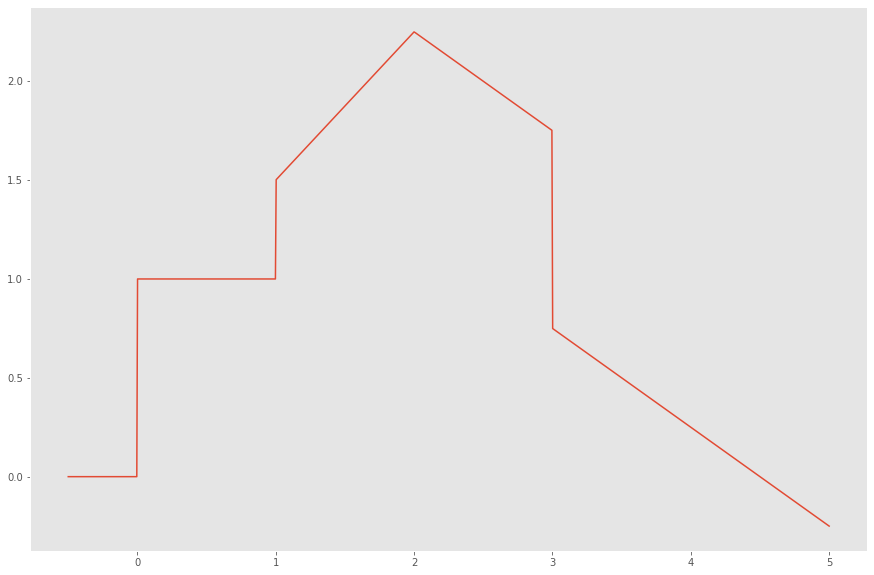

In [15]:
t = np.linspace(-0.5,5,1000)
x = G_tau(t)+0.5*G_tau(t,1)+0.75*r_tau(t,1)-1.25*r_tau(t,2)-G_tau(t,3)
plt.plot(t,x)
plt.xticks([0,1,2,3,4,5],[0,1,2,3,4,5])
plt.grid()

#### Exemple \#7

$$x(t) \;=\; 0.75r+0.5\Gamma_1-1.25r_2-\Gamma_2+0.5r_3$$

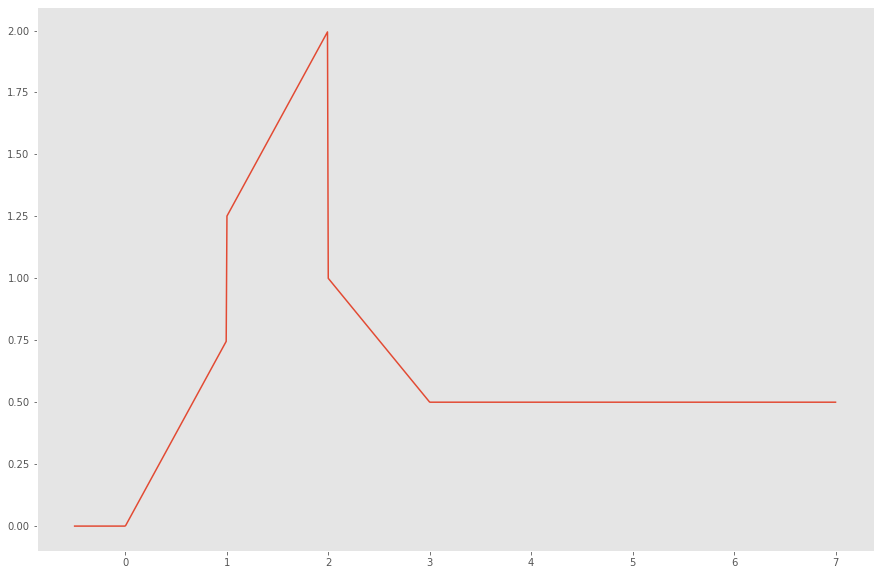

In [16]:
t = np.linspace(-0.5,7,1000)
x = 0.75*r_tau(t)+0.5*G_tau(t,1)-1.25*r_tau(t,2)-G_tau(t,2)+0.5*r_tau(t,3)
plt.plot(t,x)
plt.grid()

## Convolution des signaux <a name="conv"></a>

Soit le signal $x$ définit par :
$$x(t)\;=\;\sin(2\pi f_0 t),\quad \text{avec}\quad f_0=1Hz$$
On lui ajoute un bruit additif :
$$b(t)\;=\;-0.4\sin(2\pi f_1 t)+0.6\sin(2\pi f_2 t),\quad \text{avec}\quad f_1=250Hz \;\&\; f_2 = 350Hz$$

In [17]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = [15, 10]
plt.rc({"keymap.grid": "g", "font.serif": "Charter", "font.size": 10})

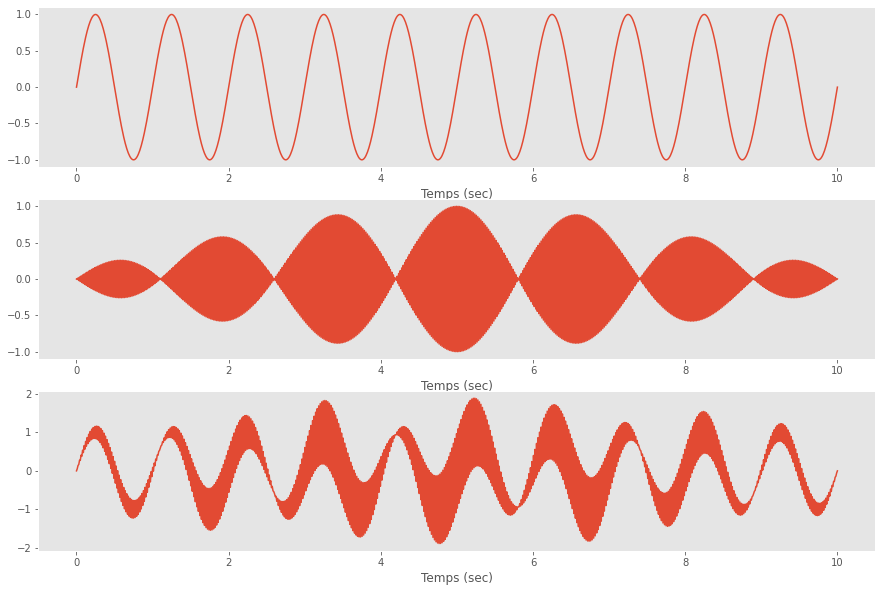

In [18]:
t = np.linspace(0,10,1000)
x = np.sin(2*np.pi*t)
f1, f2 = 250, 350
b = -0.4*np.sin(2*np.pi*f1*t)+0.6*np.sin(2*np.pi*f2*t) 
xb = x+b
plt.subplot(3,1,1)
plt.plot(t,x) # Signal non bruité
plt.xlabel('Temps (sec)')
plt.grid()
plt.subplot(3,1,2)
plt.plot(t,b) # Bruit additif
plt.xlabel('Temps (sec)')
plt.grid()
plt.subplot(3,1,3)
plt.plot(t,xb) # Signal bruité
plt.xlabel('Temps (sec)')
plt.grid()

On se propose d'appliquer le filtre de réponse impulsionnelle suivante :
$$h(t) \;=\; \dfrac{1}{\tau}\exp\left(-\dfrac{t}{\tau}\right)\quad\text{avec}\quad \tau = 0.4\,sec$$

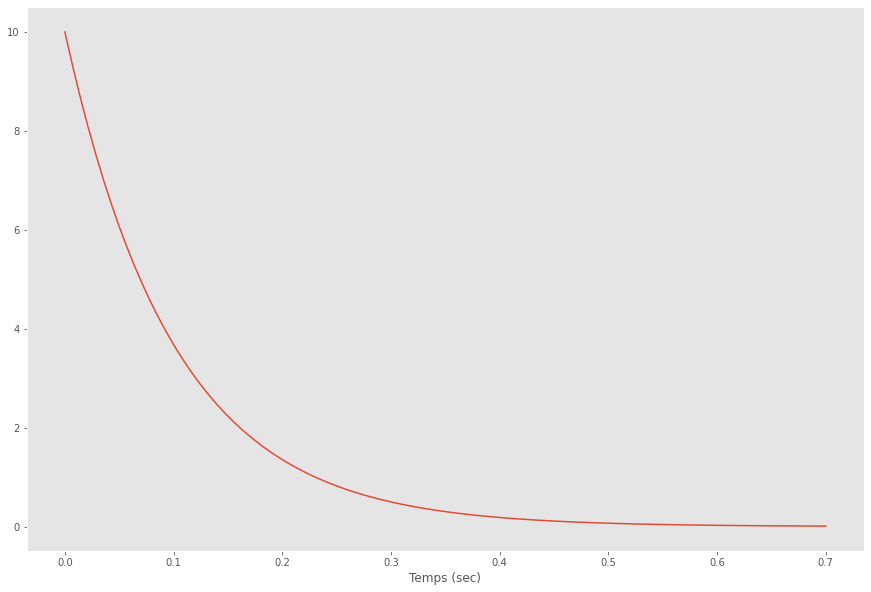

In [19]:
tau = 0.1; th = np.linspace(0, 7*tau, 100)
h = 1/tau*np.exp(-th/tau);
plt.plot(th, h)
plt.xlabel('Temps (sec)')
plt.grid()

filt = h/h.sum() # Normaliser le filtre filt = h/Sigma_h

$$
\begin{array}{lcl}
\tilde{x} &=& \left[\underbrace{\color{red}{x(t)+b(t)}}_{x_b}\right]\ast h(t)\\
&=& \underbrace{x\ast h}_{x_h} + \underbrace{b\ast h}_{b_h}
\end{array}
$$

L'application du filtre à la fonction d'origine n'a presque aucun effet sur le signal d'origine $x$

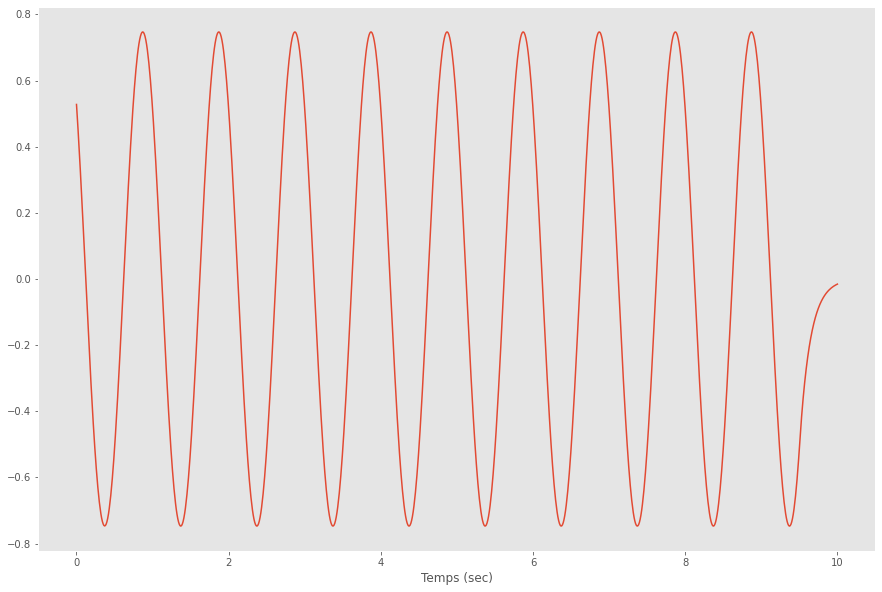

In [20]:
xh = np.convolve(x, filt,'same')
plt.plot(t, xh)
plt.xlabel('Temps (sec)')
plt.grid()

On se propose d'étudier l'effet du filtre $h$ sur le bruit additif $b$. On remarque qu'il annule presque la contribution de $b$.

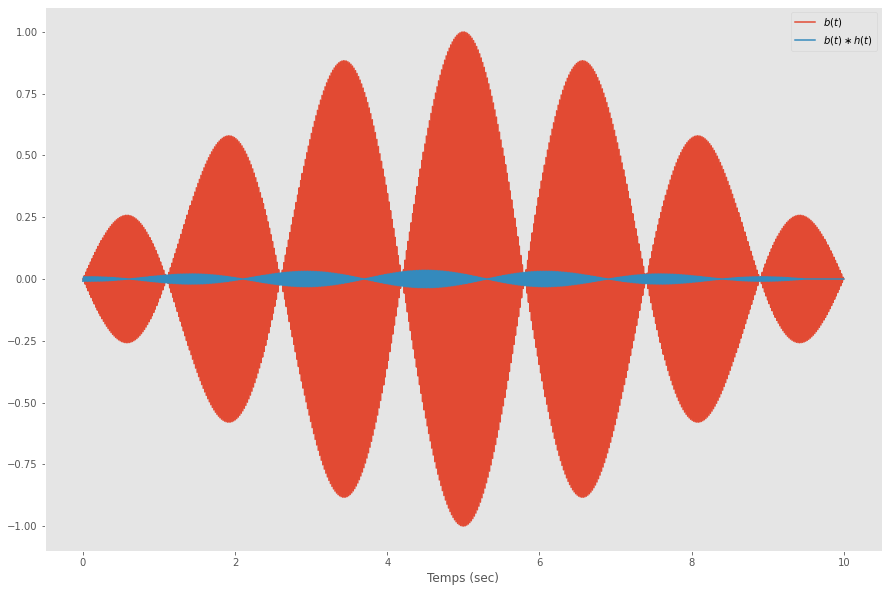

In [21]:
bh = np.convolve(b, filt, 'same')
plt.plot(t, b, label=r'$b(t)$')
plt.plot(t, bh, label=r'$b(t)\ast h(t)$')
plt.legend()
plt.xlabel('Temps (sec)')
plt.grid()

Finalement, la convolution du filtre au signal bruité donne :

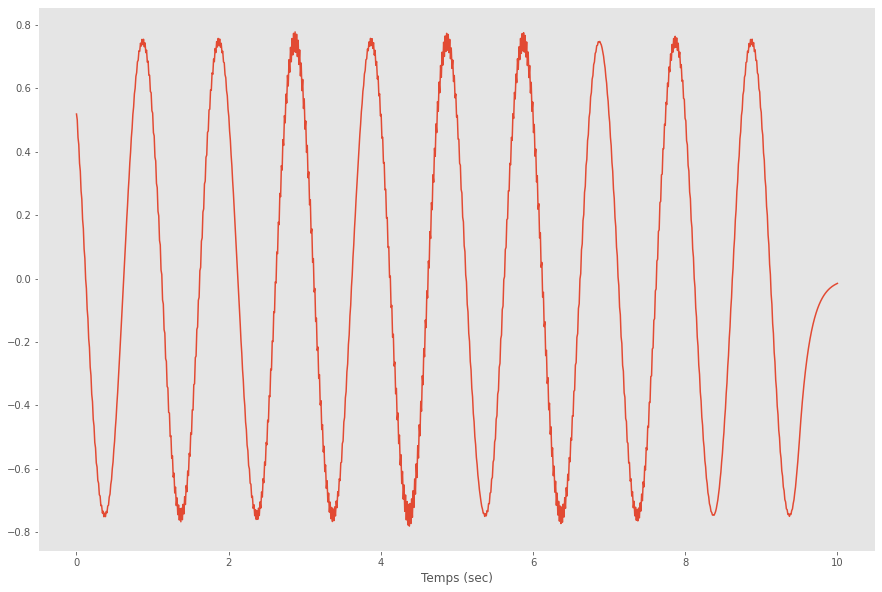

In [22]:
xf = np.convolve(xb, filt,'same')
plt.plot(t, xf)
plt.xlabel('Temps (sec)')
plt.grid()

En résumé, pour avoir comparer les graphiques, le code de la cellule suivante permet de visualiser les différents signaux.

Text(0.5, 0, 'Temps (sec)')

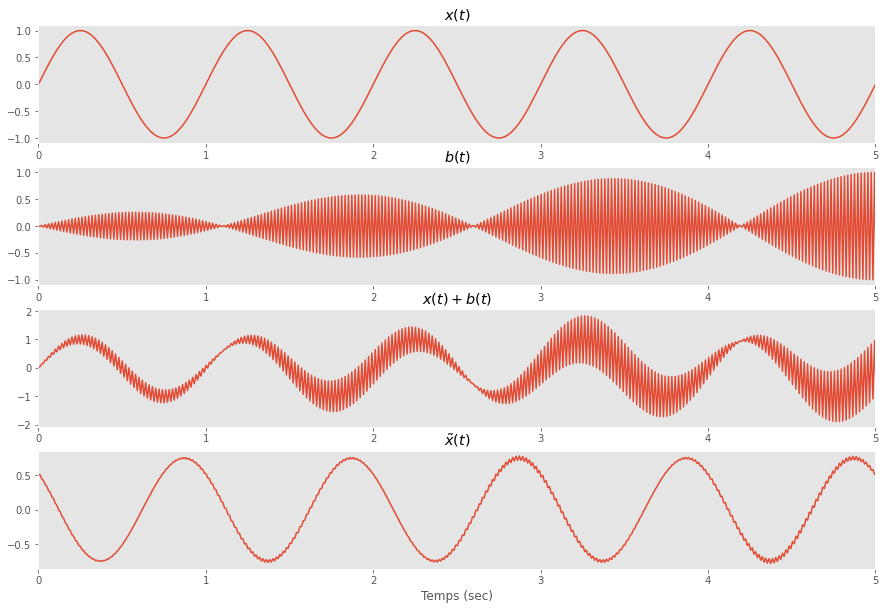

In [23]:
plt.subplot(4,1,1)
plt.plot(t, x); plt.title(r'$x(t)$')
plt.grid(); plt.xlim(0,5)
plt.subplot(4,1,2)
plt.plot(t, b); plt.title(r'$b(t)$')
plt.grid(); plt.xlim(0,5)
plt.subplot(4,1,3)
plt.plot(t, xb); plt.title(r'$x(t)+b(t)$')
plt.grid(); plt.xlim(0,5)
plt.subplot(4,1,4)
plt.plot(t, xf); plt.title(r'$\tilde{x}(t)$')
plt.grid(); plt.xlim(0,5)

plt.xlabel('Temps (sec)')

## Décomposition en série de Fourier <a name="dec-fourier"></a>

Soit $x$ un signal sinusoidal. $x$ s'écrit :
$$x(t) \;=\; \sin(\omega t +\varphi)  \quad\text{avec}\quad \omega = \dfrac{2\pi}{T}$$

Soit $f$ une fonction déterministe. $f$ est la superposition de plusieurs fonctions sinusoidales :
$$f(t) \;=\; f_0sin(\omega_0 t +\varphi_0)+f_1sin(\omega_1 t +\varphi_1) +f_2\sin(\omega_2 t +\varphi_2)+\cdots+f_nsin(\omega_n t +\varphi_n)$$
Si $f$ est périodique de période $T$ (i.e. de pulsation $\omega \,=\, \dfrac{2\pi}{T}$), elle admet alors une décomposition en série de Fourier :
$$f(t) \;=\; f_0sin(0\omega t +\varphi_0)+f_1sin(\omega t +\varphi_1) +f_2\sin(2\omega t +\varphi_2)+\cdots+f_n\sin(n\omega t +\varphi_n)$$
Etant donnée que
$$\sin\left(0\omega t +\varphi_0\right) = \sin\left(\varphi_0\right)$$
L'expression de $f$ se réduit ainsi en 
$$f(t) \;=\; f_0\sin(\varphi_0)+f_1\sin\left(\omega t +\varphi_1\right) +f_2\sin\left(2\omega t +\varphi_2\right)+\cdots+f_n\sin\left(n\omega t +\varphi_n\right)$$
Rappelons d'abord que $\forall\, \alpha,\,\beta\in\mathbb{R}$, on a :
$$\sin(\alpha+\beta) \;=\; \sin(\alpha)\cos(\beta) + \cos(\alpha)\sin(\beta)$$
Ainsi :
***
$$\sin\left(\omega t +\varphi_1\right) \;=\; \cos\left(\omega t\right)\sin\left(\varphi_1\right)+\sin\left(\omega t\right)\cos\left(\varphi_1\right)$$
***
$$\sin\left(2\omega t +\varphi_2\right) \;=\; \cos\left(\omega t\right)\sin\left(\varphi\right)+\sin\left(2\omega t\right)\cos\left(\varphi_2\right)$$
***
$$\sin\left(k\omega t +\varphi_k\right) \;=\; \cos\left(k\omega t\right)\sin\left(\varphi_k\right)+\sin\left(k\omega t\right)\cos\left(\varphi_k\right)$$
***
$$\sin\left(n\omega t +\varphi_n\right) \;=\; \cos\left(n\omega t\right)\sin\left(\varphi_n\right)+\sin\left(n\omega t\right)\cos\left(\varphi_n\right)$$
***
Il en résulte que $\forall k\in\mathbb{N}$ :
$$f_k\sin\left(k\omega t +\varphi_k\right) \;=\; \underbrace{f_k\sin\left(\varphi_k\right)}_{a_k}\cos\left(k\omega t\right)+ \underbrace{f_k\cos\left(\varphi_k\right)}_{b_k}\sin\left(k\omega t\right) \;=\ a_k\cos\left(k\omega t\right)  + b_k\sin\left(k\omega t\right)$$
On peut alors décomposer $f$ comme suit :
$$f(t) \;=\; a_0\cos\left(0\omega t +\varphi_0\right)+a_1cos\left(\omega t\right) +b_1\sin\left(\omega t\right)+a_2\cos\left(\omega t\right)+b_2\sin\left(2\omega t\right)+\cdots+a_k\cos\left(k\omega t\right) +b_k\sin\left(k\omega t\right)+\cdots+a_n\cos\left(n\omega t\right) +b_n\sin\left(n\omega t\right)$$
$$
f(t) \;=\ a_0 + \sum_{k=0}^{\infty}a_k\cos\left(k\omega t\right) + \sum_{k=0}^{\infty}b_k\sin\left(k\omega t\right)
$$
On pose $\Phi = \omega t$, une mise à jour de $f$ donne
$$
f(\Phi) \;=\ a_0 + \sum_{k=0}^{\infty}a_k\cos\left(k\Phi\right) + \sum_{k=0}^{\infty}b_k\sin\left(k\Phi\right)
$$

### Exemple d'un signal carré <a name="eg-1-sf"></a>

In [24]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = [15, 10]
plt.rc({"keymap.grid": "g", "font.serif": "Charter", "font.size": 10})

In [25]:
nt = 1000
t = np.linspace(-3,3,nt)
wt = 2 * np.pi * t/1 # F = 1Hz, i.e. T = 1 sec

Text(0.5, 0, 'Temps (sec)')

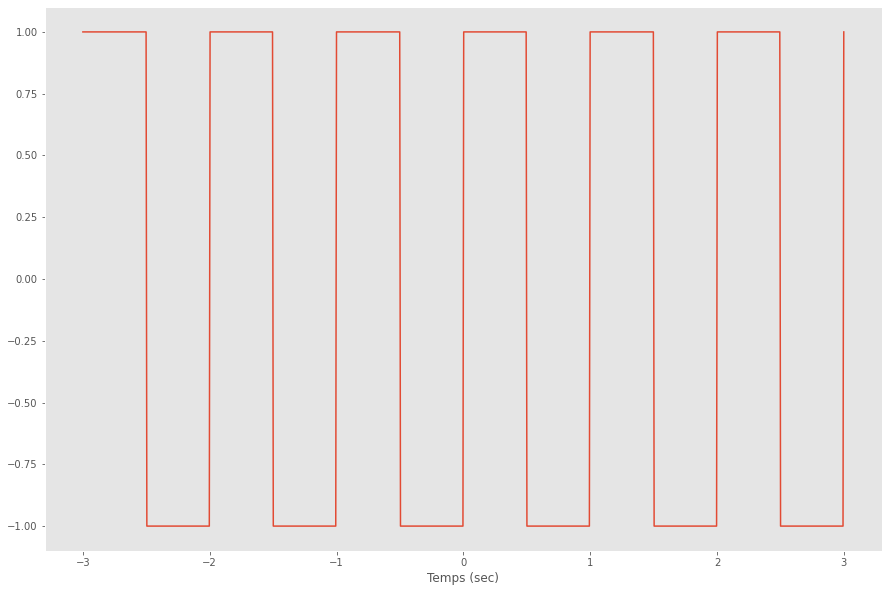

In [26]:
x = signal.square(wt, 0.5) # Amplitude A = 1
plt.plot(t,x)
plt.grid()
plt.xlabel('Temps (sec)')

$$x \approx \sum_{k=1}^{\infty}b_k\sin(k\omega t)\qquad b_k \;=\; \dfrac{4}{k\pi}$$

In [27]:
"""
x1 = np.sin(1 * 2 * np.pi * t)/1
x3 = np.sin(3 * 2 * np.pi * t)/3
x5 = np.sin(5 * 2 * np.pi * t)/5
x7 = np.sin(7 * 2* np.pi * t)/7
x9 = np.sin(9 * 2* np.pi * t)/9
x11 = np.sin(11 * 2* np.pi * t)/11

xapp = 4/np.pi*(x1+x3+x5+x7+x11)
"""

'\nx1 = np.sin(1 * 2 * np.pi * t)/1\nx3 = np.sin(3 * 2 * np.pi * t)/3\nx5 = np.sin(5 * 2 * np.pi * t)/5\nx7 = np.sin(7 * 2* np.pi * t)/7\nx9 = np.sin(9 * 2* np.pi * t)/9\nx11 = np.sin(11 * 2* np.pi * t)/11\n\nxapp = 4/np.pi*(x1+x3+x5+x7+x11)\n'

<class 'list'>
<class 'numpy.ndarray'>
(10, 1000)
(1000,)


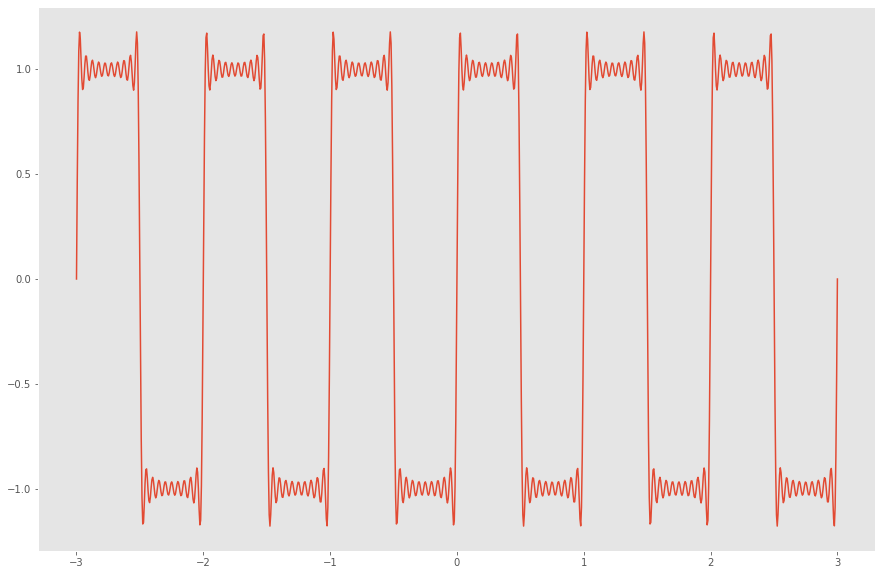

In [28]:
xapp_lst = [ 4/(k*np.pi) * np.sin(k * wt) for k in range(1,20,2) ]
print(type(xapp_lst))
xapp_np = np.asarray(xapp_lst) # Conversion list --> numpy
print(type(xapp_np))
print(xapp_np.shape)
xapp = xapp_np.sum(axis=0) # Somme sur les colonnes
print(xapp.shape)
plt.plot(t, xapp)
plt.grid()

### Exemple d'un signal en dents de scie <a name="eg-2-sf"></a>

In [29]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = [15, 10]
plt.rc({"keymap.grid": "g", "font.serif": "Charter", "font.size": 10})

Text(0.5, 0, 'Temps (sec)')

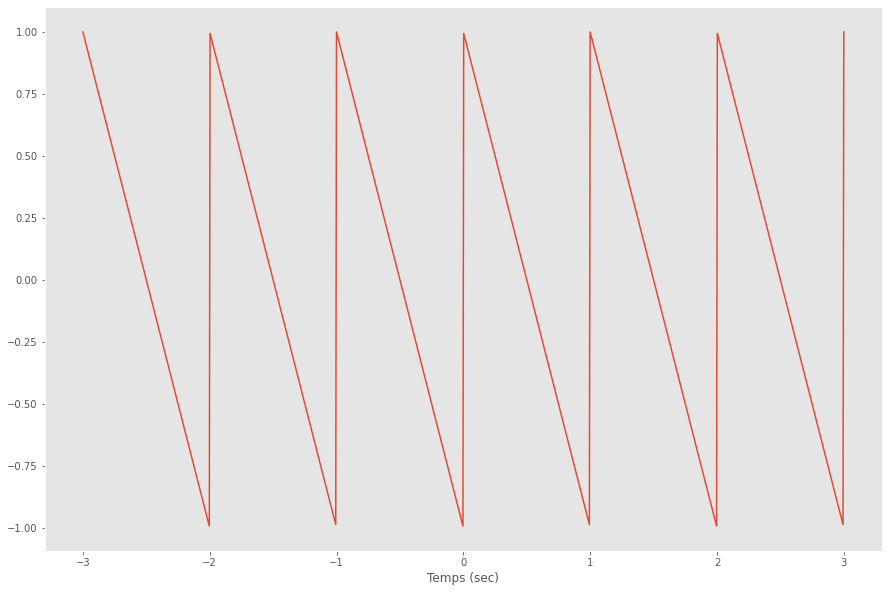

In [30]:
plt.plot(t, signal.sawtooth(wt, 0))
plt.grid()
plt.xlabel('Temps (sec)')

La troncature de $x$ sur une période est :
$$x(t) \;=\; \Gamma - 2r$$

La valeur moyenne de $x$ :

$$\begin{array}{ccl}
\overline{x} &=& \dfrac{1}{1}\displaystyle\int_{0}^{1}\left(\Gamma -2r\right)dt\\
&=& \displaystyle\int_{0}^{1}\left(1 \right)dt-2\displaystyle\int_{0}^{1}\left(t\right)dt\\
&=& 1 -2\left[\dfrac{t^2}{2}\right]_{0}^{1}\\
&=& 1 - 1 \\
&=& 0
\end{array}
$$

$$x \;=\; \overline{x}+x_{\sim}(t)$$

Le signal $x$ est impaire $\Longrightarrow a_k = 0 \forall k$

$$x_{\sim} \;=\; \sum_{k=1}^{\infty}b_k\sin(k\omega t)\qquad b_k\;=\; \dfrac{2}{T}\int_{0}^{T}x(t)\sin(k\omega t)$$

Calcul de $b_k$

$$\begin{array}{ccl}
b_k &=& \dfrac{2}{1}\displaystyle\int_{0}^{1}x(t)\sin(k\omega t)\\
&=& 2\displaystyle\int_{0}^{1}\left(\Gamma - 2r\right)\sin(k\omega t)\\
&=& 2\underbrace{\displaystyle\int_{0}^{1}1\sin(k\omega t)}_{=0} - 4 \displaystyle\int_{0}^{1}t\sin(k\omega t)\\
&=& - 4 \displaystyle\int_{0}^{1}\underbrace{t}_{F}\underbrace{\sin(k\omega t)}_{g}\\
&=& -4 \left(\left[\phantom{\displaystyle\int}FG\phantom{\displaystyle\int}\right]_{0}^{1} - \displaystyle\int_{0}^{1}fG\right)\\
&=& 4 \left(\left[\phantom{\displaystyle\int}t\dfrac{1}{k\omega}\cos\left(k\dfrac{2\pi}{1} t\right)\phantom{\displaystyle\int}\right]_{0}^{1} - \displaystyle\int_{0}^{1}\dfrac{1}{k\omega}\cos(k\omega t)\right)dt\\
&=& 4\left(\dfrac{1}{2k\pi}\right)\\
&=& \dfrac{2}{k\pi}
\end{array}$$

$$(FG)' \;=\; fG + gF$$

$$F(t) \;=\; t \rightarrow f(t) \;=\; 1$$
$$g(t) \;=\; \sin(k\omega t) \rightarrow F(t) \;=\; -\dfrac{1}{k\omega}\cos(k\omega t)$$

Text(0.5, 0, 'Temps (sec)')

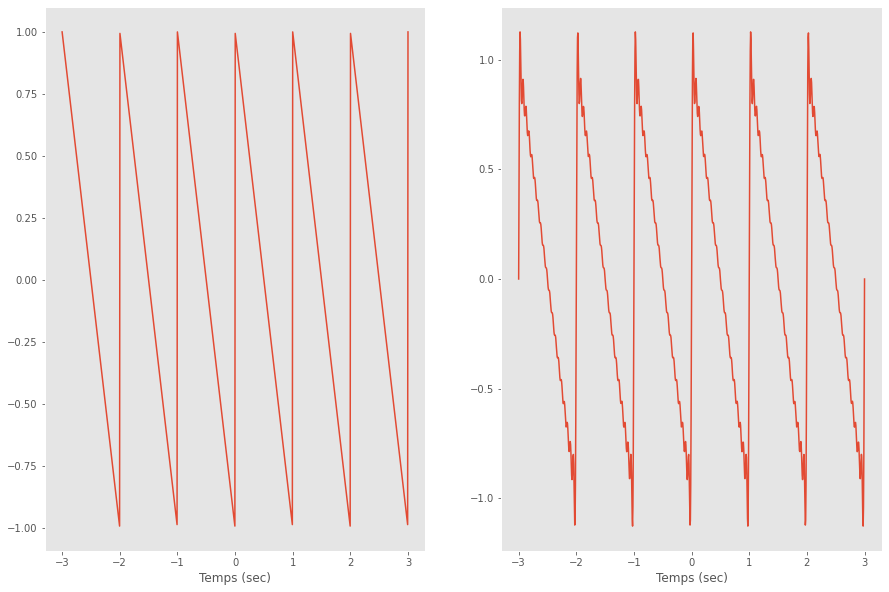

In [31]:
xapp_lst = [ 2/(k*np.pi) * np.sin(k * wt) for k in range(1,20) ]
xapp_np = np.asarray(xapp_lst) # Conversion list --> numpy
xapp = xapp_np.sum(axis=0) # Somme sur les colonnes

plt.subplot(1,2,1)
plt.plot(t, signal.sawtooth(wt, 0))
plt.grid()
plt.xlabel('Temps (sec)')
plt.subplot(1,2,2)
plt.plot(t, xapp)
plt.grid()
plt.xlabel('Temps (sec)')

## Transformée de Fourier <a name="tf-fourier"></a>

In [32]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = [15, 10]
plt.rc({"keymap.grid": "g", "font.serif": "Charter", "font.size": 10})

In [33]:
# Créer un signal sinusoïdal
ts = 0.001
t = np.arange(0,1,ts)
n = len(t)
x = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*150*t) # Deux fréquences : f1 = 50Hz et f2 = 150Hz
b = 3*np.random.randn(n) # Ajout du bruit
xb = x + b # Signal bruité 

**Calcul de la Transformée de Fourier Rapide *(en: FFT)* **

In [34]:
x_f = np.fft.fft(xb, n)                

Densité spectrale de puissance *(en: Power Spectrum Density)* (puissance/ fréquence)

In [35]:
dsp = x_f * np.conj(x_f) / n 
print(np.max(dsp))

(371.8949754834041+0j)


**Usage de la DSP pour le débruitage**
Il s'agit de chercher les fréquences ayany des DSP très large et d'annuler les autres termes.

In [36]:
idx = dsp > 100     
x_f = idx * x_f   
x_t_app = np.fft.ifft(x_f) 

Il reste maintenant à tracer les graphiques de $x$, de $x_b$ et de $\hat{x}$

/home/mhamdi/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


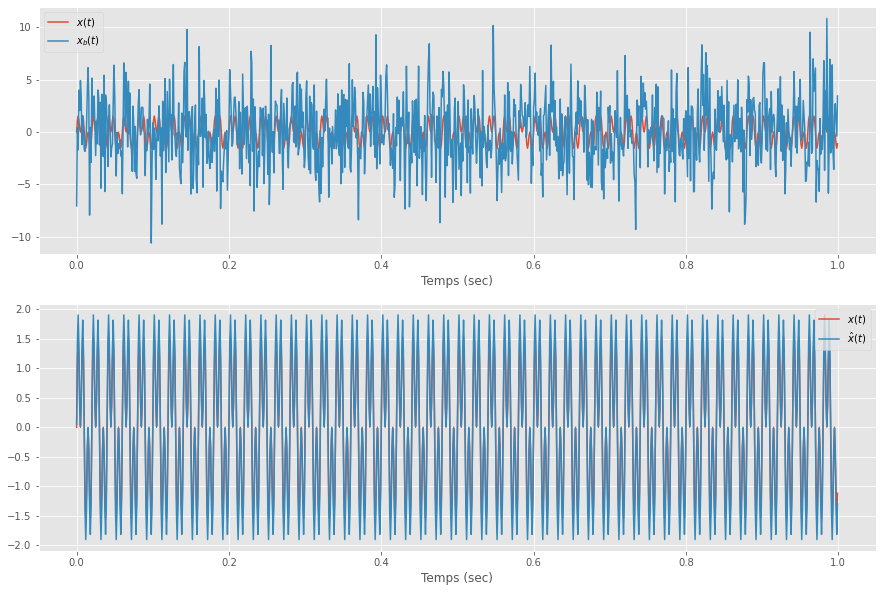

In [37]:
fig,axs = plt.subplots(2,1)

plt.subplot(2,1,1)
plt.plot(t, x, label=r'$x(t)$')
plt.plot(t, xb, label=r'$x_b(t)$')
plt.xlabel('Temps (sec)')
plt.legend()

plt.subplot(2,1,2)
plt.plot(t,x,label=r'$x(t)$')
plt.plot(t,x_t_app,label=r'$\hat{x}(t)$')
plt.xlabel('Temps (sec)')
plt.legend()